# **Load Fused Dataset**

In [4]:
import pandas as pd

df = pd.read_csv('/content/new_fused_dataset.csv')

print("DataFrame loaded successfully. Displaying the first 5 rows:")
df.head()

DataFrame loaded successfully. Displaying the first 5 rows:


,suicides/100k pop,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 5-9 years,Income composition of resources,Schooling,HDI for year,gdp_per_capita ($)
0,8.27,developing,76.2,91,1,5.28,41.822757,99,10,54.3,...,99,5.34,99,0.1,494.358832,1.5,0.725,12.5,-1.18134,-0.679695
1,5.38,developing,76.2,91,1,5.28,41.822757,99,10,54.3,...,99,5.34,99,0.1,494.358832,1.5,0.725,12.5,-1.18134,-0.679695
2,5.01,developing,76.2,91,1,5.28,41.822757,99,10,54.3,...,99,5.34,99,0.1,494.358832,1.5,0.725,12.5,-1.18134,-0.679695
3,3.94,developing,76.2,91,1,5.28,41.822757,99,10,54.3,...,99,5.34,99,0.1,494.358832,1.5,0.725,12.5,-1.18134,-0.679695
4,3.58,developing,76.2,91,1,5.28,41.822757,99,10,54.3,...,99,5.34,99,0.1,494.358832,1.5,0.725,12.5,-1.18134,-0.679695


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15264 entries, 0 to 15263
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   suicides/100k pop                15264 non-null  float64
 1   Status                           15264 non-null  object 
 2   Life expectancy                  15264 non-null  float64
 3   Adult Mortality                  15264 non-null  int64  
 4   infant deaths                    15264 non-null  int64  
 5   Alcohol                          15264 non-null  float64
 6   percentage expenditure           15264 non-null  float64
 7   Hepatitis B                      15264 non-null  int64  
 8   Measles                          15264 non-null  int64  
 9   BMI                              15264 non-null  float64
 10  under-five deaths                15264 non-null  int64  
 11  Polio                            15264 non-null  int64  
 12  Total expenditure 

**Explanation**
Based on the `df.info()` output, all columns except 'Status' are numerical. `StandardScaler` is used to  select these numerical features, and then apply the scaler to transform them. The scaled features will be stored in a new DataFrame.



# **Scale Data**

Scaling is crucial for DBSCAN as it relies on distance metrics and ensures that all features contribute equally to the clustering process.


In [7]:
from sklearn.preprocessing import StandardScaler

#Select numerical features only, exclude 'Status' column
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Standardize feature for distance-based clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features])

#Convert to DataFrame for convenience
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)

print("Numerical features scaled successfully. Displaying the first 5 rows of scaled data:")
print(scaled_df.head())

Numerical features scaled successfully. Displaying the first 5 rows of scaled data:
   suicides/100k pop  Life expectancy  Adult Mortality  infant deaths  \
0          -0.216872         0.111501        -0.317116      -0.315335   
1          -0.375640         0.111501        -0.317116      -0.315335   
2          -0.395966         0.111501        -0.317116      -0.315335   
3          -0.454749         0.111501        -0.317116      -0.315335   
4          -0.474526         0.111501        -0.317116      -0.315335   

    Alcohol  percentage expenditure  Hepatitis B   Measles       BMI  \
0 -0.469481               -0.527596     0.568634 -0.199018  0.396747   
1 -0.469481               -0.527596     0.568634 -0.199018  0.396747   
2 -0.469481               -0.527596     0.568634 -0.199018  0.396747   
3 -0.469481               -0.527596     0.568634 -0.199018  0.396747   
4 -0.469481               -0.527596     0.568634 -0.199018  0.396747   

   under-five deaths     Polio  Total expend

### **One-Hot Encode 'Status' Column**

The 'Status' column is categorical, and machine learning models typically require numerical input. One-hot encoding transforms this categorical column into a numerical format, creating new binary columns for each unique category. This ensures that the clustering algorithm can effectively utilize this feature.

In [8]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the 'Status' column
status_encoded = encoder.fit_transform(df[['Status']])

# Create a DataFrame from the encoded features
status_df = pd.DataFrame(status_encoded, columns=encoder.get_feature_names_out(['Status']))

# Concatenate the one-hot encoded 'Status' DataFrame with the scaled numerical features
scaled_df = pd.concat([scaled_df, status_df], axis=1)

print("One-hot encoding applied to 'Status' column and merged with scaled features. Displaying the first 5 rows of updated scaled data:")
print(scaled_df.head())

One-hot encoding applied to 'Status' column and merged with scaled features. Displaying the first 5 rows of updated scaled data:
   suicides/100k pop  Life expectancy  Adult Mortality  infant deaths  \
0          -0.216872         0.111501        -0.317116      -0.315335   
1          -0.375640         0.111501        -0.317116      -0.315335   
2          -0.395966         0.111501        -0.317116      -0.315335   
3          -0.454749         0.111501        -0.317116      -0.315335   
4          -0.474526         0.111501        -0.317116      -0.315335   

    Alcohol  percentage expenditure  Hepatitis B   Measles       BMI  \
0 -0.469481               -0.527596     0.568634 -0.199018  0.396747   
1 -0.469481               -0.527596     0.568634 -0.199018  0.396747   
2 -0.469481               -0.527596     0.568634 -0.199018  0.396747   
3 -0.469481               -0.527596     0.568634 -0.199018  0.396747   
4 -0.469481               -0.527596     0.568634 -0.199018  0.396747   


# **Perform DBSCAN Clustering**


In [14]:
from sklearn.cluster import DBSCAN

#Apply DBSCAN with tuned parameters
dbscan = DBSCAN(eps=1.0, min_samples=10)
df['dbscan_cluster'] = dbscan.fit_predict(scaled_df)

# Add the dbscan_cluster labels to scaled_df for viewing the numerical status
scaled_df['dbscan_cluster'] = df['dbscan_cluster']

#Clustering DBSCAN will produce both number of unique cluster and noise points
# Get the number of unique clusters (excluding noise points labeled as -1)
num_clusters = len(set(df['dbscan_cluster'])) - (1 if -1 in df['dbscan_cluster'] else 0)
# Get the number of noise points
num_noise_points = list(df['dbscan_cluster']).count(-1)

print(f"Number of clusters found: {num_clusters}")
print(f"Number of noise points: {num_noise_points}")

Number of clusters found: 579
Number of noise points: 1727


# **Visualize Clusters**




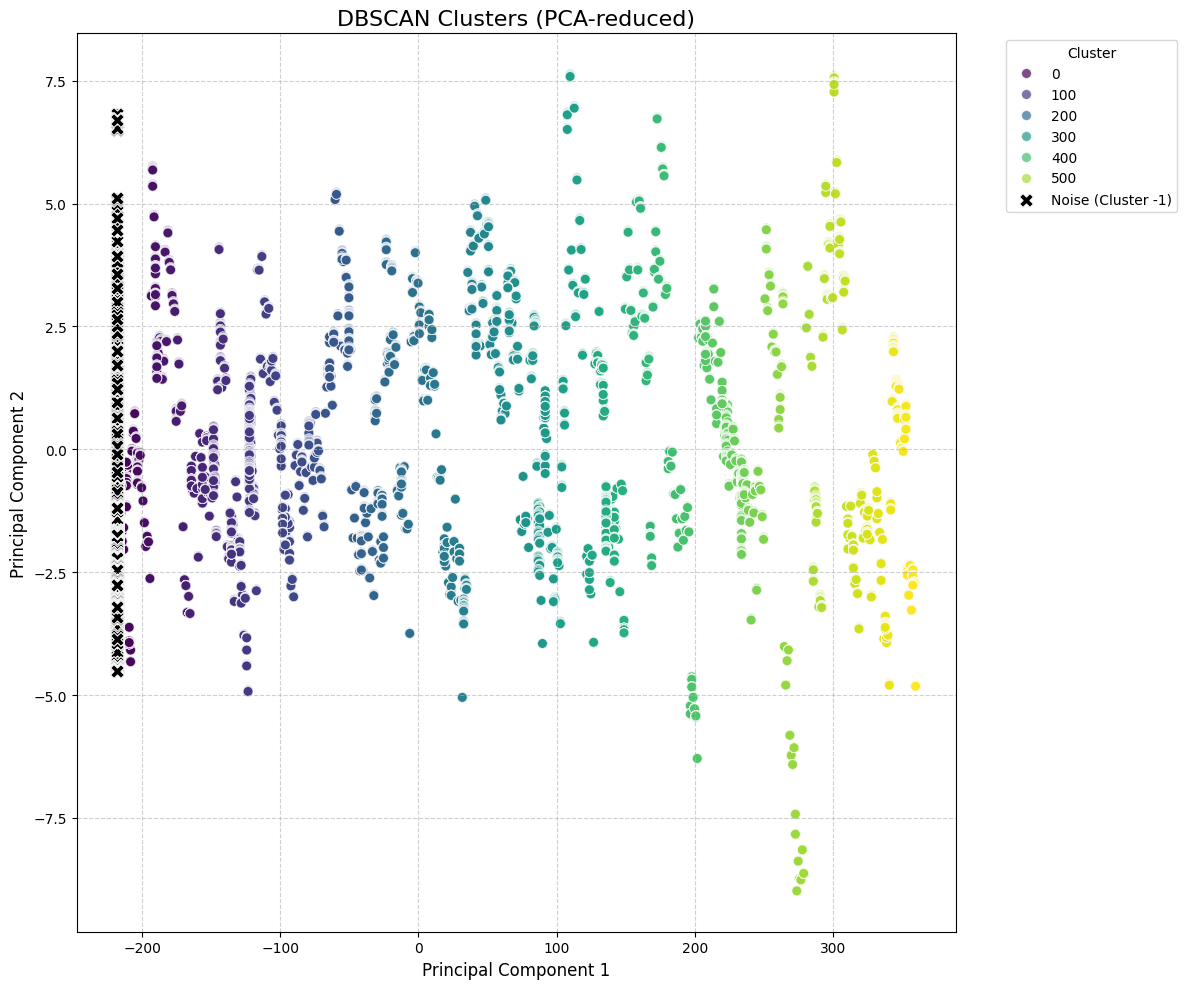

Scatter plot of DBSCAN clusters using PCA for dimensionality reduction generated.


In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#Reduce data to 2D using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_df)

#Create new DataFrame for visualization
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df['dbscan_cluster'] = df['dbscan_cluster']

#Plot clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='PC1', y='PC2', hue='dbscan_cluster', data=pca_df,
    palette='viridis',  # Use a perceptually uniform colormap
    s=50, # Marker size
    alpha=0.7 # Transparency for better visibility of overlapping points
)

# Highlight noise points
noise_points = pca_df[pca_df['dbscan_cluster'] == -1]
sns.scatterplot(
    x='PC1', y='PC2', data=noise_points, color='black', marker='X', s=100, label='Noise (Cluster -1)'
)

plt.title('DBSCAN Clusters (PCA-reduced)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("Scatter plot of DBSCAN clusters using PCA for dimensionality reduction generated.")

# **Final Summary**

DBSCAN was applied to the scaled fused dataset using eps = 1.0 and min_samples = 10.
The algorithm identified 579 clusters and classified 1727 data points as noise.

The tuned parameters resulted in fewer clusters and noise points, indicating that smaller fragmented clusters were merged into larger, denser groupings. PCA-based visualization showed many localized clusters along with scattered noise points, reflecting the complex and heterogeneous structure of the fused dataset.





### Insights or Next Steps


**Visual Confirmation of Numerous Clusters:** The plot clearly shows a very fragmented landscape with many different colors representing distinct clusters. This visually confirms the summary's point about identifying 579 clusters. You can see numerous small, localized groupings of points, rather than a few large, cohesive clusters.

**Scattered Noise Points:** The black 'X' marks, representing the 1727 noise points, are visibly scattered throughout the plot. They don't belong to any dense region and often appear as isolated points or small groups of outliers, which aligns perfectly with their definition as noise.

**Complex and Heterogeneous Structure:** The overall visual impression is one of high complexity and granularity. There isn't a single, overarching pattern but rather many distinct, dense pockets of data (clusters) separated by regions of lower density or noise. This supports the insight that the fused dataset has a complex and heterogeneous structure.

**Impact of One-Hot Encoding:** While the plot itself doesn't explicitly label 'developed' vs. 'developing' regions, the fact that we're seeing this level of granularity after including the one-hot encoded 'Status' column suggests that this categorical feature is playing a role in defining these dense regions. The 'Status' information, along with other scaled numerical features, contributes to the density landscape that DBSCAN uses to form these numerous, often small, clusters.



Further investigation could involve visualizing a sample of these clusters and noise points to understand their spatial distribution and characteristics. Additionally, exploring a range of `eps` and `min_samples` values could help determine if there are more optimal parameters for identifying larger, more meaningful clusters.
